num_classes : 3
classe_names : ['charger', 'headphone', 'laptop']


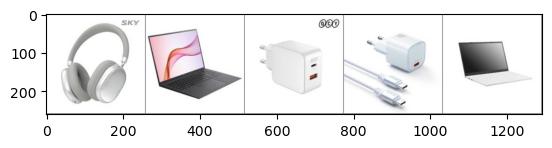

headphone laptop charger charger laptop
Device:  cpu
[1,     6] loss: 1.220
[1,    12] loss: 1.106
[2,     6] loss: 1.169
[2,    12] loss: 1.127
[3,     6] loss: 1.013
[3,    12] loss: 1.022
[4,     6] loss: 0.982
[4,    12] loss: 0.870
[5,     6] loss: 0.866
[5,    12] loss: 0.668
[6,     6] loss: 0.755
[6,    12] loss: 1.245
[7,     6] loss: 0.963
[7,    12] loss: 0.820
[8,     6] loss: 0.827
[8,    12] loss: 0.686
[9,     6] loss: 0.621
[9,    12] loss: 0.678
[10,     6] loss: 0.319
[10,    12] loss: 0.895
Finished Training


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from customdataset import CustomImageDataset
from electronic_model import Net

def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
################################################################################################

transform = transforms.Compose(
    [transforms.ToTensor(),
        transforms.Resize((256, 256)),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 5 ## 배치 사이즈 5

data_path = "./dataset_electronics" ## 상대 경로
train_data_set = CustomImageDataset(data_set_path=f"{data_path}/train",
                                    transforms=transform)
trainloader = torch.utils.data.DataLoader(train_data_set, batch_size=batch_size, shuffle=True)

num_classes = train_data_set.num_classes
classes = train_data_set.class_names

print("num_classes :", num_classes)
print("classe_names :", classes)

###############################################################################################

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Device: ", device)

################################################################################################

net = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

n_epochs = 10 ## 원래 epochs는 10이 적당한 것 같습니다!

for epoch in range(n_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 6 == 5:     # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 6:.3f}')
            running_loss = 0.0

print('Finished Training')

#####################################################################################################

PATH = './electronics_net.pth'
torch.save(net.state_dict(), PATH)

del dataiter

####################################################################################################